In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from astropy import units as u
from astropy import constants as c
import gc
from tqdm import tqdm

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.injections.pbh import PBHAccretionInjection

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

In [ ]:
model_name_s = ['PRc23', 'PRc10', 'PRc50', 'PRc23B', 'PRc23d', 'PRc23H', 'BHLl2']

z_s = np.geomspace(4, 1000, 100)

unity = (1 * u.eV/u.s/u.cm**3 / c.c**2).to(u.M_sun/u.yr/u.Mpc**3)

cf_halo_power_s = []
cf_cosmo_power_s = []
cf_total_power_s = []
for name in tqdm(model_name_s):
    inj = PBHAccretionInjection(name, m_PBH=100, f_PBH=1)
    cf_halo_power_s.append(np.array([inj.inj_power(z, debug='halo only') / (1+z)**3 for z in z_s]) * unity.value)
    cf_cosmo_power_s.append(np.array([inj.inj_power(z, debug='cosmo only') / (1+z)**3 for z in z_s]) * unity.value)
    del inj
    gc.collect()
cf_halo_power_s = np.array(cf_halo_power_s)
cf_cosmo_power_s = np.array(cf_cosmo_power_s)
cf_total_power_s = cf_halo_power_s + cf_cosmo_power_s

100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


In [ ]:
zorder_s = np.arange(0, -len(model_name_s), -1)

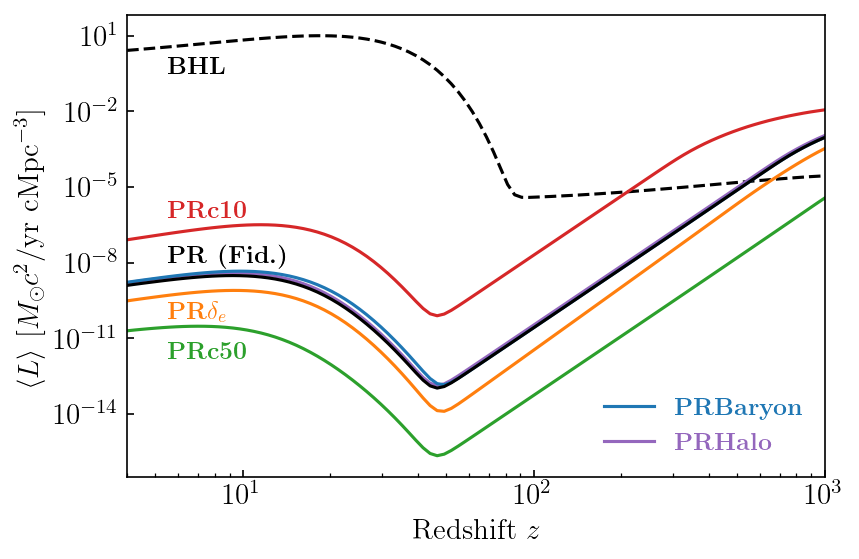

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs

# model_latex_s = [r'PR fid.', r'PR DM-B', r'PR Halo', r'BHL']
model_latex_s = model_name_s
# color_s = mpl.colormaps['plasma']([0., 0.2, 0.4, 0.6, 0.8, 0.9, 0.])
color_s = ['k', 'C0', 'C1', 'C2', 'C3', 'C4', 'k']
ls_s = ['-', '-', '-', '-', '-', '-', '--']
zorder_s = np.arange(0, -len(model_name_s), -1)

text_s = [r'$\textbf{PR (Fid.)}$', r'$\textbf{PRc10}$', r'$\textbf{PRc50}$', r'$\textbf{PRBaryon}$', r'$\textbf{PR}\delta_e$', r'$\textbf{PRHalo}$', r'$\textbf{BHL}$']
label_s = [r'$\textbf{PR (Fid.)}$', r'$\textbf{PRc10}$', r'$\textbf{PRc50}$', r'$\textbf{PRBaryon}$', r'$\textbf{PR}\delta_e$', r'$\textbf{PRHalo}$', r'$\textbf{BHL}$']
text_x_s = [5.5, 5.5, 5.5, None, 5.5, None, 5.5]
text_y_s = 10.**np.array([-8, -6.2, -11.8, 0, -10.2, 0, -0.5])
labeled_s = [False, False, False, True, False, True, False]

for i in range(len(model_name_s)):
    # ax.plot(z_s, cf_halo_power_s[i], color=color_s[i], alpha=0.5, zorder=zorder_s[i], ls=ls_s[i])
    # ax.plot(z_s, cf_cosmo_power_s[i], color=color_s[i], alpha=0.5, zorder=zorder_s[i], ls=ls_s[i])
    label = text_s[i] if labeled_s[i] else None
    ax.plot(z_s, cf_total_power_s[i], color=color_s[i], label=label, zorder=zorder_s[i], ls=ls_s[i], lw=1.5)
    if text_x_s[i]:
        ax.text(text_x_s[i], text_y_s[i], text_s[i], color=color_s[i], fontsize=12)
ax.set(xscale='log', yscale='log')
ax.set(xlim=(4, 1000))
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\langle L\rangle$ [$M_\odot c^2$/yr cMpc$^{-3}$]')
legend = ax.legend(frameon=False, loc='lower right')
legend_colors = ['C2', 'C4']
for text, color in zip(legend.get_texts(), legend_colors):
    text.set_color(color)

fig.savefig('pbhacc-L-z.pdf', bbox_inches='tight')